In [1]:
import numpy as np
import xarray as xr
import netCDF4
from netCDF4 import Dataset
import datetime as dt
import os
import glob
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm  #colormap
import xesmf as xe
from matplotlib import ticker as mplTicker
from matplotlib import rc
from time import time
import string
import regionmask
import geopandas as gpd
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
from textwrap import wrap
%matplotlib inline
import matplotlib.gridspec as gridspec

In [2]:
from Attribution_Tools import *

# Load In Pre-Processed Data with All Variables

In [ ]:
#Load Data 
Historical_Data = xr.open_mfdataset("/Post_Processed_Data/Historical_Data.nc")  
RPGW_Data = xr.open_mfdataset("/Post_Processed_Data/RPGW_Data.nc") 
RPGW_P_Data = xr.open_mfdataset("/Post_Processed_Data/RPGW_P_Data.nc") 
RPGW_T_Data = xr.open_mfdataset("/Post_Processed_Data/RPGW_T_Data.nc") 
GCM_P_T_Data = xr.open_mfdataset("/Post_Processed_Data/GCM_P_T_Data.nc") 
GCM_T_Data = xr.open_mfdataset("/Post_Processed_Data/GCM_T_Data.nc")

In [4]:
Data_Dict = {"Historical":Historical_Data, "RPGW":RPGW_Data, "RPGW_P":RPGW_P_Data, "RPGW_T":RPGW_T_Data,
            "GCM_P_T":GCM_P_T_Data, "GCM_T":GCM_T_Data}

In [ ]:
Climatological_Data = xr.open_mfdataset("Climatological_Data.nc")

# Load in Basin Masks 

In [ ]:
# First) Load Shapefile that will use as Mask
dict_of_regional_basin_variables = {}
regional_basins_of_interest = 'regional_basins_3.shp'
regional_basins_of_interest = gpd.read_file(regional_basins_of_interest)
regional_basins_of_interest = regional_basins_of_interest[0:3]
regional_basins_of_interest['Label'] = ['Colorado River Basin','Sierra Nevadas','Columbia River Basin']
# Second) Create regionmask from geopandas shapefile 
mask = regionmask.from_geopandas(
    regional_basins_of_interest, names="Label", abbrevs="_from_name", name="Label")
#Third) Make Masks
Basin_Mask=mask.mask(Historical_Data)

# Plots

## Basin Map

In [ ]:
##PLOTTING FUNCTION##
#################
#plot_basins(shape_file)
#################

##DESCRIPTION##
#################
#Creates Map of the Three WUS Riverine Basins Used#
#################

##ARGUMENTS##
#################
#shape file: the shape file provided (regional_basins_of_interest)
#################

### Figure 1

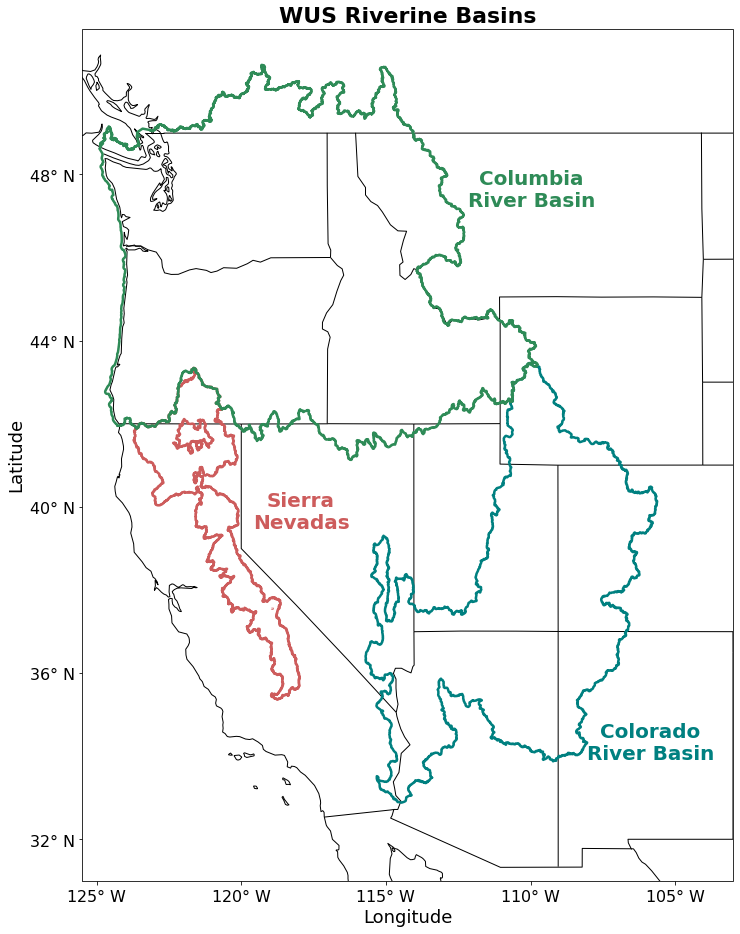

In [6]:
plot_basins(regional_basins_of_interest)

## Full Drought Period Spatial Plot

In [ ]:
##PLOTTING FUNCTION##
#################
#drought_period_spatial_plot(data, clim_data)
#################

##DESCRIPTION##
#################
#Creates Spatial Plots of Key Variables Over the Full Drought Period#
#Spatial plot of (Row 1)variable mean, (Row 2)climatoligical anomaly, 
    #(Row 3)GCM-PT change, and (Row 4)RPGW changes 
#Variables: T2, Precip, ET, Soil Moisture, Max SWE
#################

##ARGUMENTS##
#################
#data: Attribution Data Dictionary (Data_Dict)
#clim_data: Provided climatalogical(1953-2020) mean data (Climatological_Data)
#################

### Figure 4

T2
RAINRATE
ACCET_Rate
CSM
SNEQV


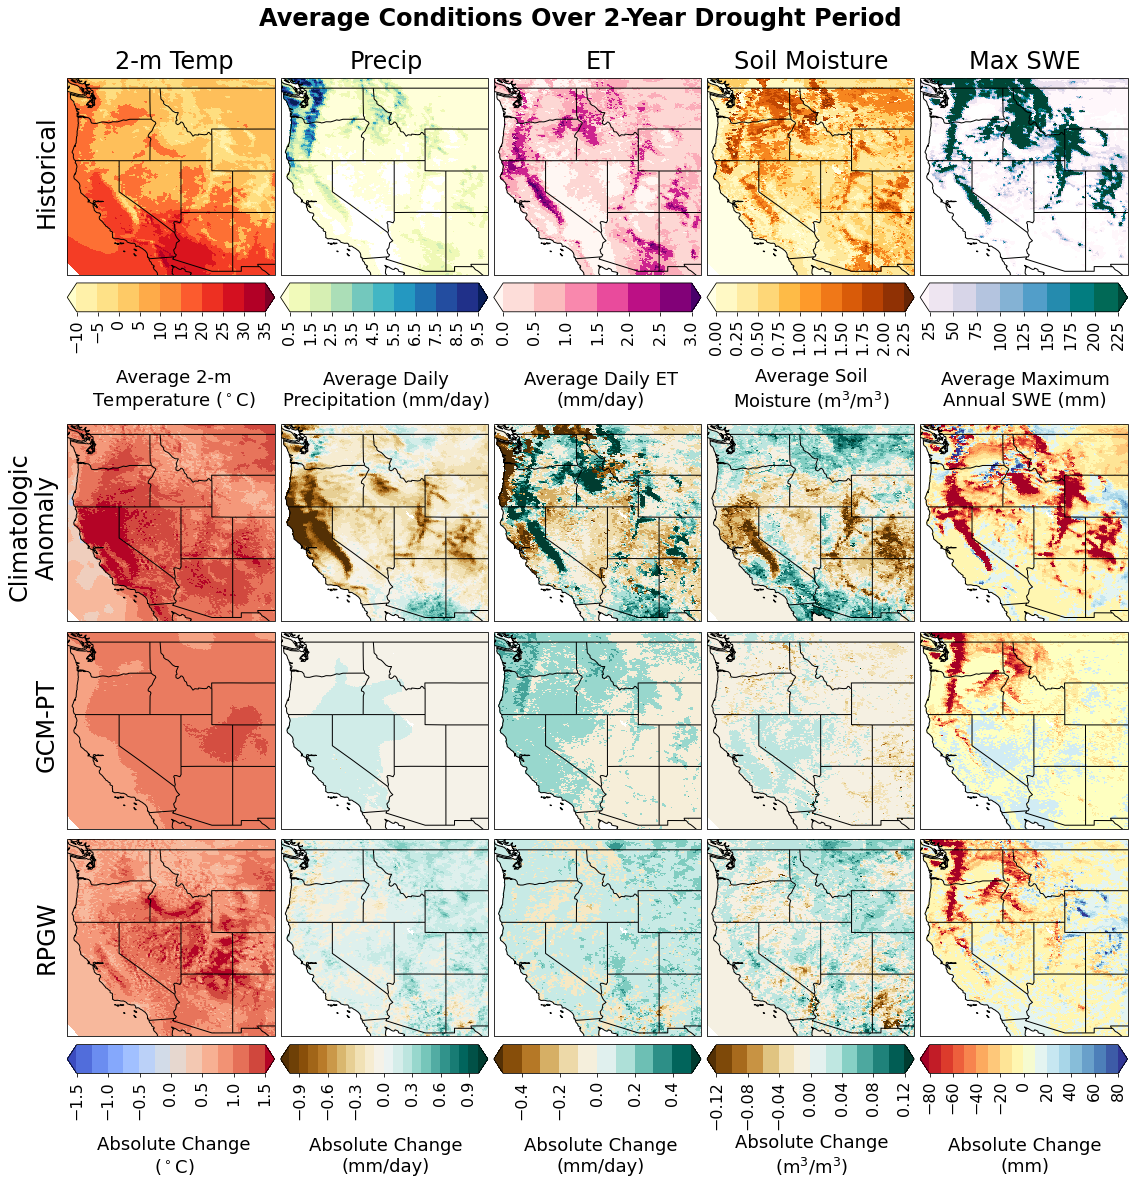

In [8]:
drought_period_spatial_plot(Data_Dict, Climatological_Data)

## Checkerboard Plots

### Figure 5

In [ ]:
##PLOTTING FUNCTION##
#################
#full_drought_checkerboard_plot(data, mask, var, calc_type, km3, vrange, step, units, var_name, color_map)
#################

##DESCRIPTION##
#################
#Creates Checkerboard Plot for Full Drought Period#
#Plots changes in a variable for the full drought period for each basin 
    #comparing the RPGW and GCM-PT experiments
#################

##ARGUMENTS##
#################
#var: variable name 
#calc_type: method for calculating change (mean/total/percent)
    #mean: spatial and temporal mean
    #total: spatial and temporal total
    #percent: total as percent change
#km3: can convert variables in mm/day to km^3 (yes/no)
    #if calc_type is total or percent for water budget variables like RAINRATE and RNFRATE_UTC
#vrange: Range for colorbar (#)
#step: step for colorbar (#)
#units: units for colorbar axis label
#var_name: name of variable for plot title 
#color_map: colormap 
#################

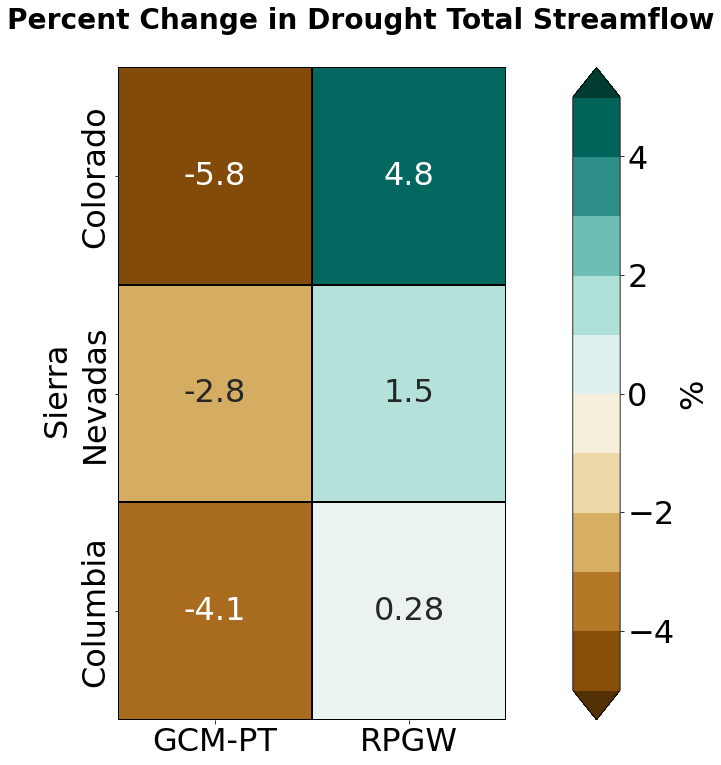

In [9]:
full_drought_checkerboard_plot(Data_Dict, Basin_Mask,"RNFRATE_UTC", "percent", "yes", 6, 1, "km3", "Streamflow", 'BrBG')

### Example Seasonal Checkerboard 

In [ ]:
##PLOTTING FUNCTION##
#################
#seasonal_checkerboard_plot(data, mask, var, calc_type, km3, vrange, step, units, var_name, color_map)
#################

##DESCRIPTION##
#################
#Creates Checkerboard Plot for Seasonal Changes#
#Plots changes in a variable seasonally for the drought period for each basin 
    #comparing the RPGW and GCM-PT experiments
#################

##ARGUMENTS##
#################
#var: variable name 
#calc_type: method for calculating change (mean/total/percent)
    #mean: spatial and temporal mean
    #total: spatial and temporal total
    #percent: total as percent change
#km3: can convert variables in mm/day to km^3 (yes/no)
    #if calc_type is total or percent for water budget variables like RAINRATE and RNFRATE_UTC
#vrange: Range for colorbar (#)
#step: step for colorbar (#)
#units: units for colorbar axis label
#var_name: name of variable for plot title 
#color_map: colormap 
#################

GCM-PT Calc Done
RPGW Calc Done


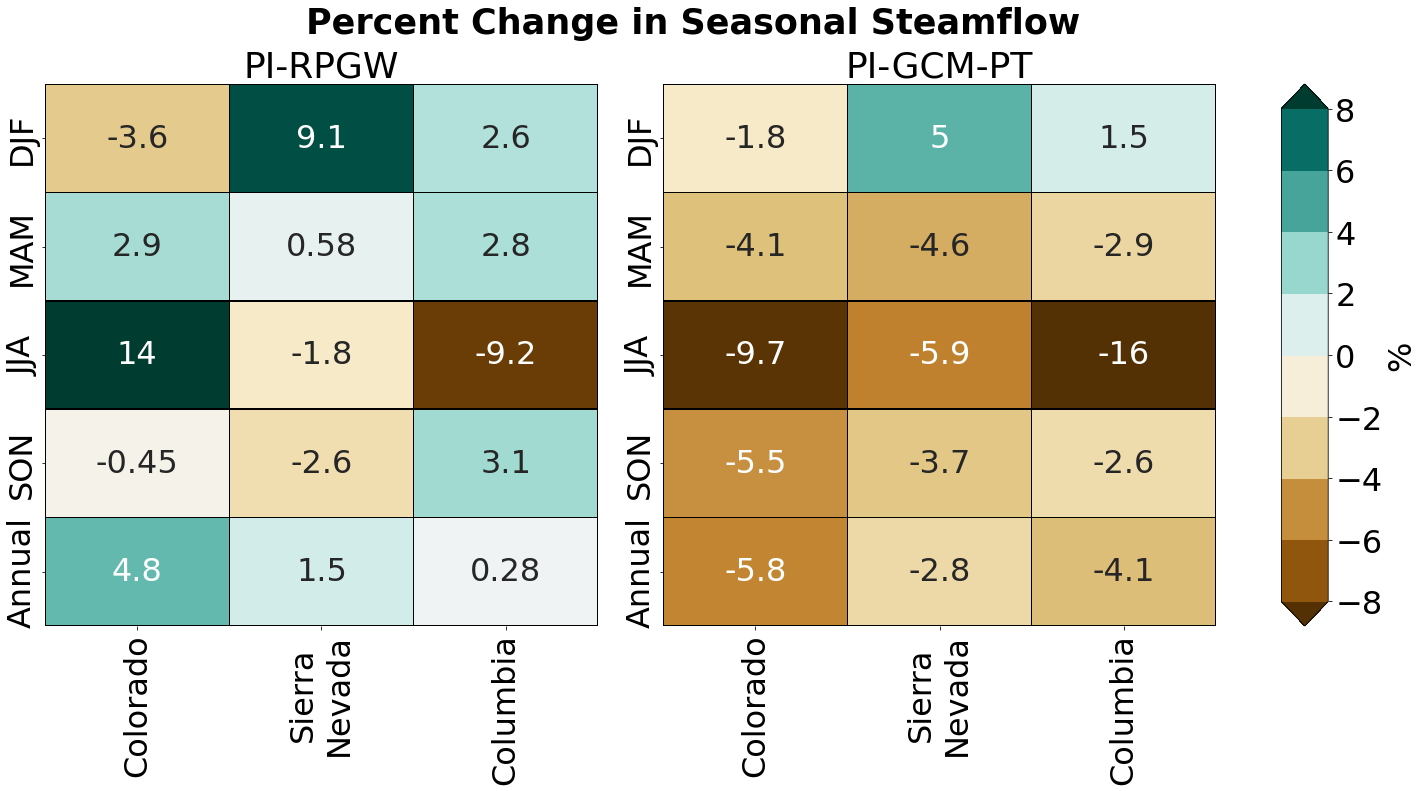

In [10]:
seasonal_checkerboard_plot(Data_Dict, Basin_Mask, "RNFRATE_UTC", "percent", "yes",10, 2, "mm/day","Steamflow", "BrBG")

## Seasonal Spatial Plots

In [ ]:
##PLOTTING FUNCTION##
#################
#seasonal_spatial_plot_RPGW_GCM_P_T(data, mask, basin, var, var_name, units, color1, color2, 
#vmax, vmin, step1, vrange, step2)
#################

##DESCRIPTION##
#################
#3-Row Seasonal Spatial Plots#
#Creates spatial plot for a variables seasonal mean and changes for the RPGW and GCM-PT experiments
#################

##ARGUMENTS##
#################
#basin: geographic focus of spatial plot (full/Colorado/Sierra Nevadas/Columbia)
#var: variable to plot
#var_name: name of variable for plot title
#units: units for colorbar label
#color1: colormap for variable mean
#color2: colormap for variable change
#vmax: maximum value for variable mean colorbar
#vmin: minimum value for variable mean colorbar
#step1: step for variable mean colorbar
#vrange: range for change colorbar
#step2: step for change colorbar
#################

In [ ]:
##PLOTTING FUNCTION##
#################
#seasonal_spatial_plot_RPGW(data, mask, basin, var, var_name, var_name_short, units, color1, color2, 
#vmax, vmin, step1, vrange, step2)
#################

##DESCRIPTION##
#################
#2-Row Seasonal Spatial Plots#
#Creates spatial plot for a variables seasonal mean and changes for the RPGW experiment
#################

##ARGUMENTS##
#################
#basin: geographic focus of spatial plot (full/Colorado/Sierra Nevadas/Columbia)
#var: variable to plot
#var_name: name of variable for plot title
#var_name_short: Shortened variable name for colorbar labels 
#units: units for colorbar label
#color1: colormap for variable mean
#color2: colormap for variable change
#vmax: maximum value for variable mean colorbar
#vmin: minimum value for variable mean colorbar
#step1: step for variable mean colorbar
#vrange: range for change colorbar
#step2: step for change colorbar
#################

In [ ]:
##PLOTTING FUNCTION##
#################
#seasonal_spatial_plot_RH_VPD(data, mask, var, var_name, var_name_short, units, 
#color1, color2, vmax, vmin, step1, vrange, step2)
#################

##DESCRIPTION##
#################
#3-Row Seasonal Spatial Plots for VPD & RH#
#Creates spatial plot for a RH or VPD seasonal mean and changes for the RPGW and GCM-PT experiments
#################

##ARGUMENTS##
#################
#var: variable to plot (RH/VPD)
#var_name: name of variable for plot title
#var_name_short: Shortened variable name for colorbar labels 
#units: units for colorbar label
#color1: colormap for variable mean
#color2: colormap for variable change
#vmax: maximum value for variable mean colorbar
#vmin: minimum value for variable mean colorbar
#step1: step for variable mean colorbar
#vrange: range for change colorbar
#step2: step for change colorbar
#################

### Figure 6

DJF
MAM
JJA
SON


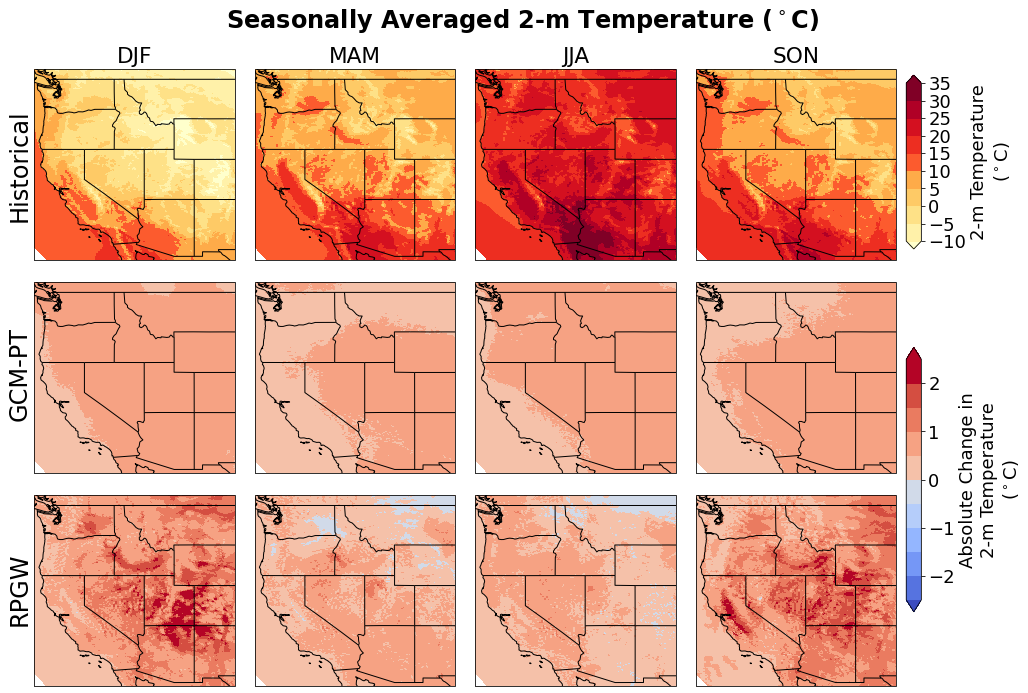

In [11]:
seasonal_spatial_plot_RPGW_GCM_P_T(Data_Dict, Basin_Mask, "full", "T2", "2-m Temperature", "($^\circ$C)", 'YlOrRd', 'coolwarm', 40, -10, 5, 2.5, .5)

### Figure 7

DJF
MAM
JJA
SON


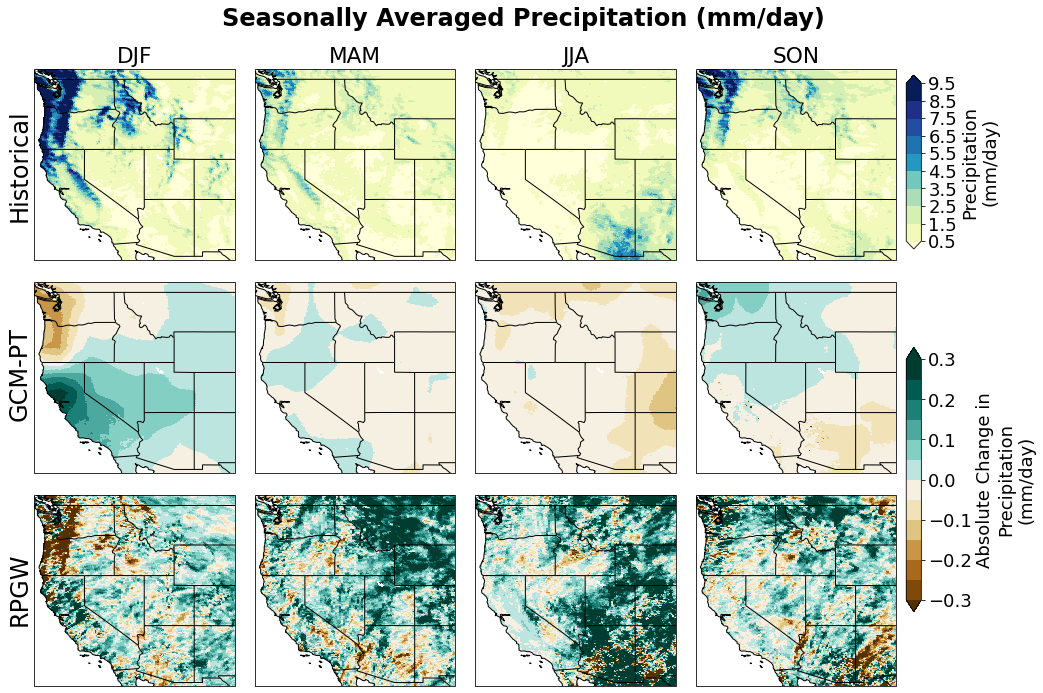

In [12]:
seasonal_spatial_plot_RPGW_GCM_P_T(Data_Dict, Basin_Mask, "full", "RAINRATE", "Precipitation", "(mm/day)", 
                                   "YlGnBu",'BrBG', 10, .5, 1, .3,.05)

### Figure 8

DJF
MAM
JJA
SON


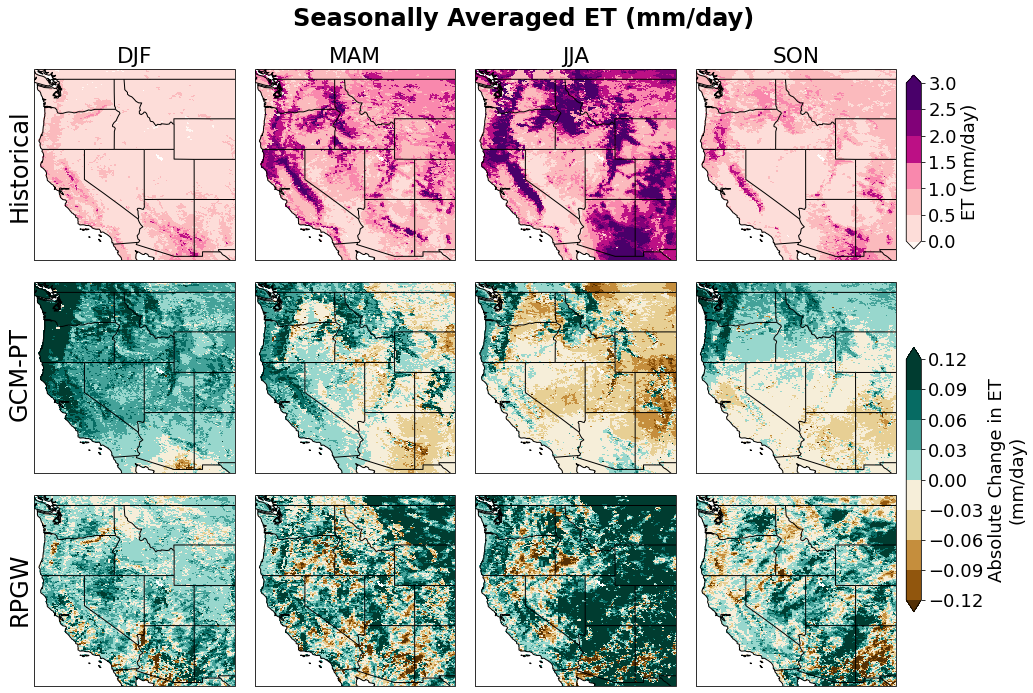

In [13]:
seasonal_spatial_plot_RPGW_GCM_P_T(Data_Dict, Basin_Mask,"full", "ACCET_Rate", "ET", "(mm/day)", 
                                   "RdPu", "BrBG", 3.5, 0, .5, .12, .03)

### Figure 9

DJF
MAM
JJA
SON


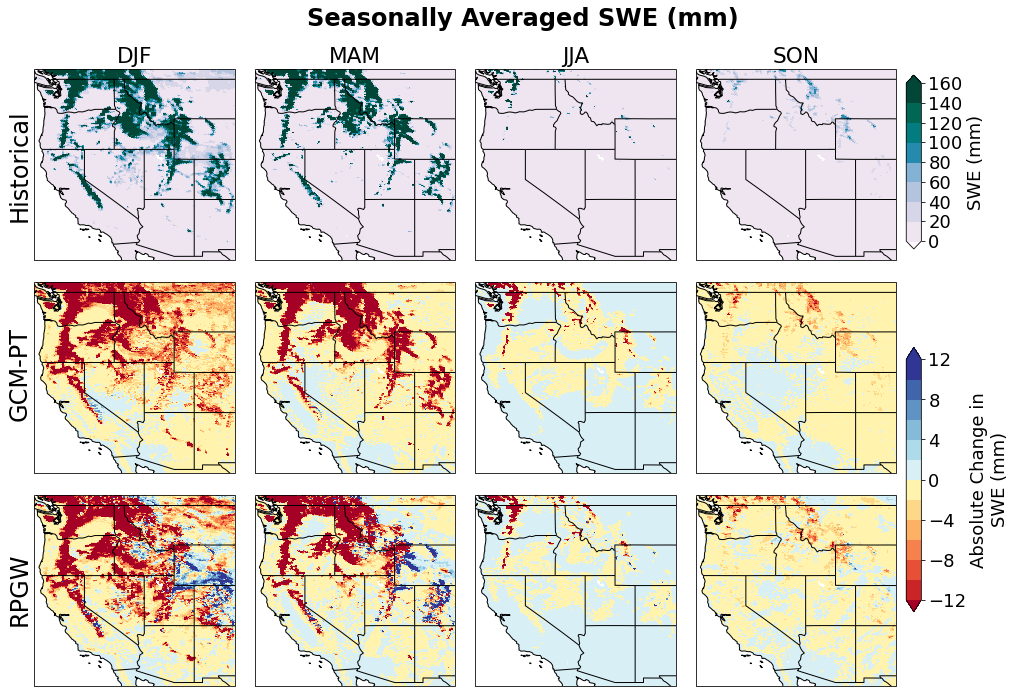

In [14]:
seasonal_spatial_plot_RPGW_GCM_P_T(Data_Dict, Basin_Mask,"full", "SNEQV", "SWE", "(mm)", 
                                   "PuBuGn", "RdYlBu", 170, 0, 20, 12, 2)

### Figure 10

DJF
MAM
JJA
SON


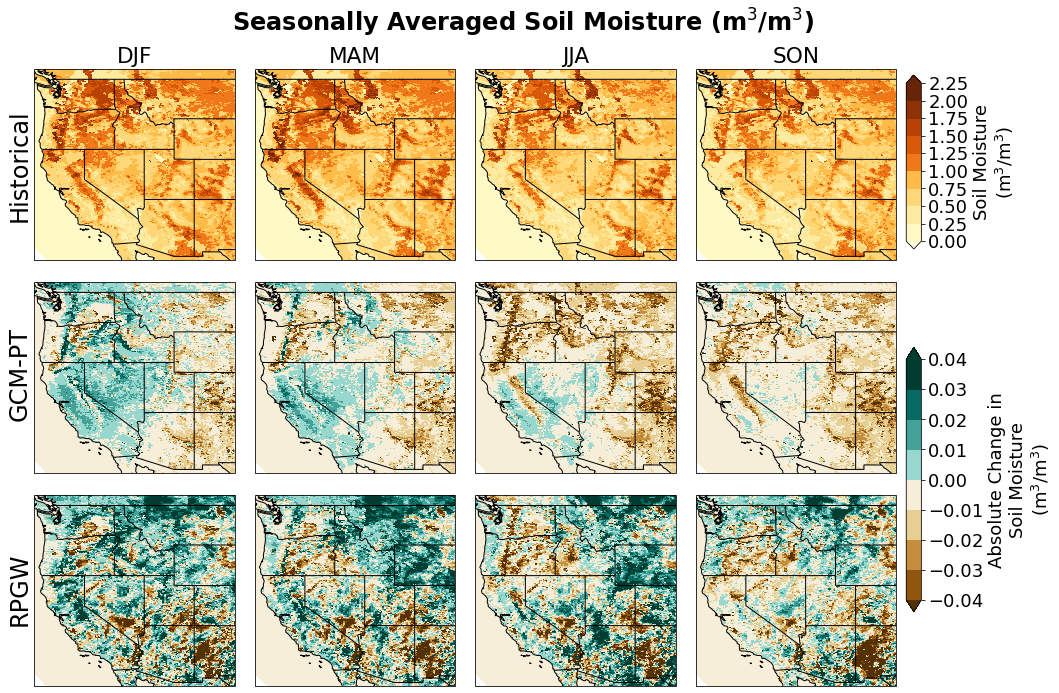

In [15]:
seasonal_spatial_plot_RPGW_GCM_P_T(Data_Dict, Basin_Mask,"full", "CSM", "Soil Moisture", "(m$^3$/m$^3$)", 
                                   "YlOrBr", "BrBG", 2.5, 0, .25, .04, .01)

### Figure S1

DJF
MAM
JJA
SON


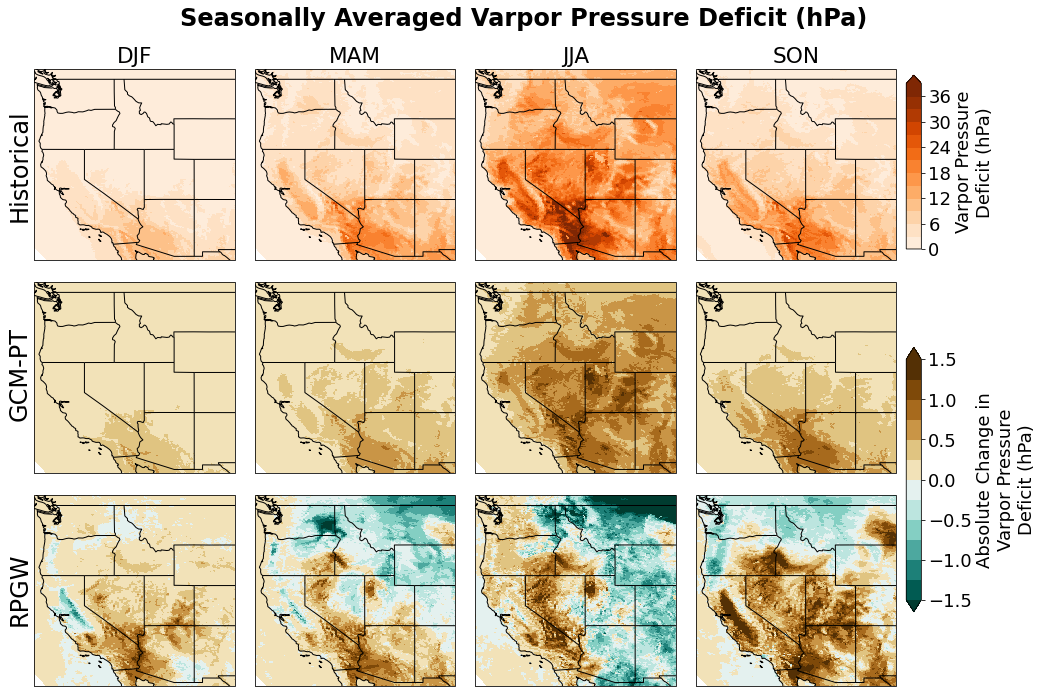

In [16]:
seasonal_spatial_plot_RH_VPD(Data_Dict, Basin_Mask,"VPD", "Varpor Pressure Deficit", "VPD", 
                                          "(hPa)", "Oranges", "BrBG_r", 42, 0, 3, 1.5, .25)

### Figure S2

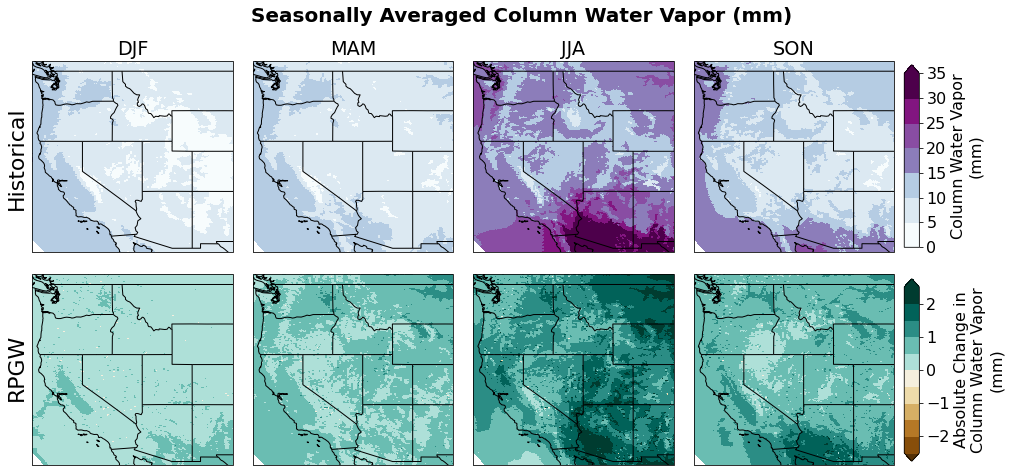

In [17]:
seasonal_spatial_plot_RPGW(Data_Dict, Basin_Mask,"full", "CWV", "Column Water Vapor", 
                           "Column Water Vapor","(mm)", 'BuPu','BrBG', 40, 0, 5,2.5,.5)

### Figure S3

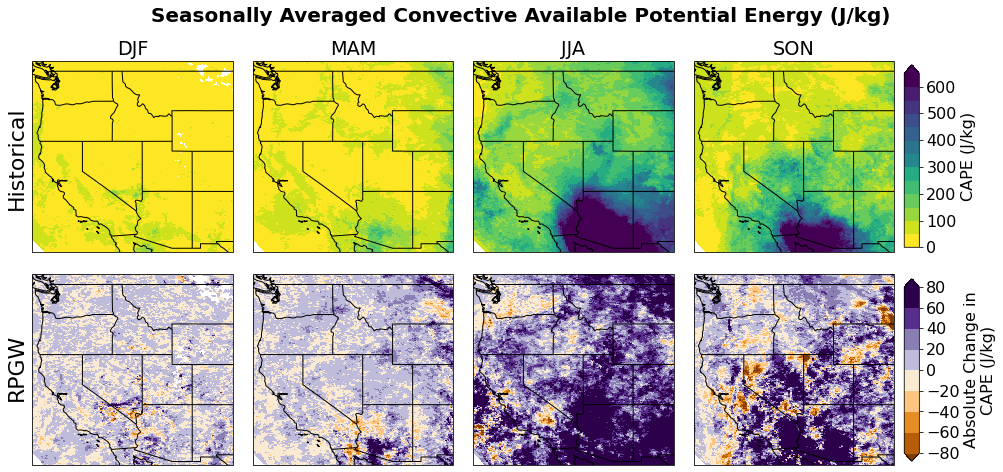

In [18]:
seasonal_spatial_plot_RPGW(Data_Dict, Basin_Mask,"full", "CAPE", "Convective Available Potential Energy", 
                           "CAPE","(J/kg)", "viridis_r", "PuOr", 700, 0, 50,80,20)

### Figure S4

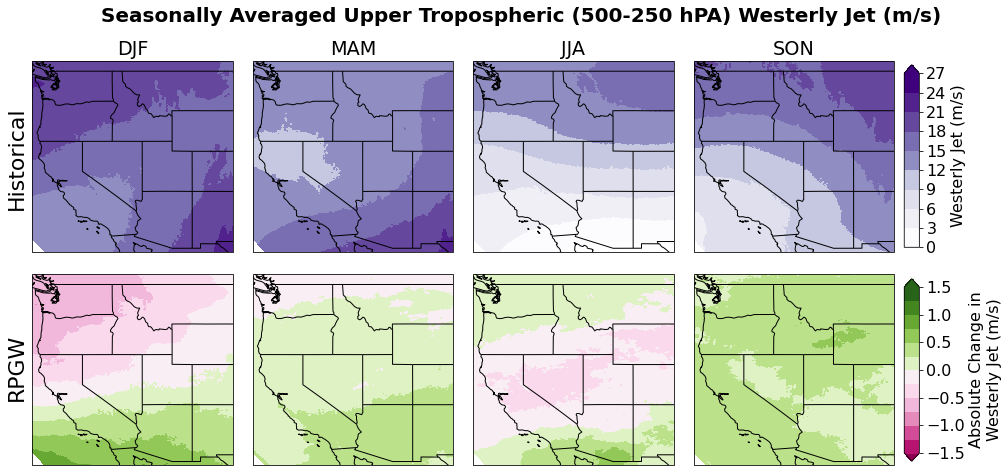

In [19]:
seasonal_spatial_plot_RPGW(Data_Dict, Basin_Mask,"full", "JET", "Upper Tropospheric (500-250 hPA) Westerly Jet", "Westerly Jet",
                           "(m/s)", "Purples", "PiYG", 30, 0, 3, 1.5, .25)

### Figure S5

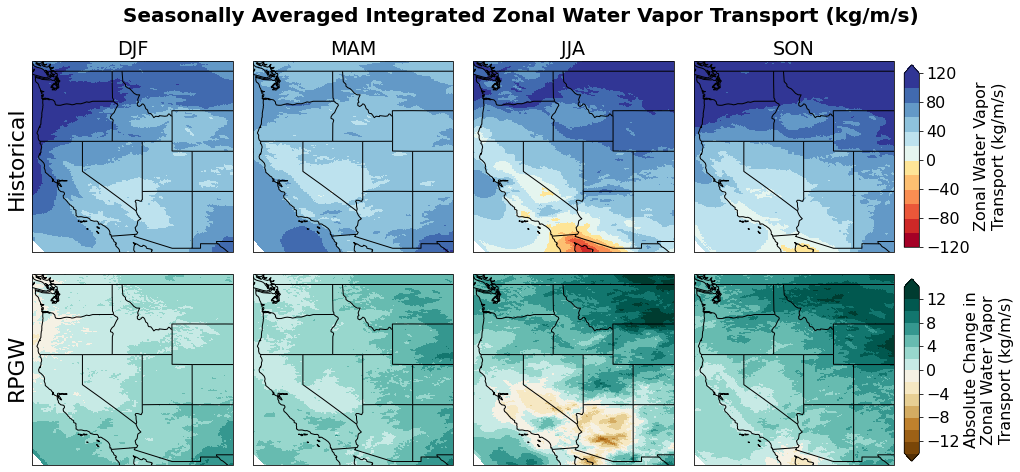

In [20]:
seasonal_spatial_plot_RPGW(Data_Dict, Basin_Mask,"full", "IVT_U", "Integrated Zonal Water Vapor Transport", 
                           "Zonal Water Vapor Transport","(kg/m/s)", "RdYlBu", "BrBG", 130, -120, 20,14,2)

### Figure S6

DJF
MAM
JJA
SON


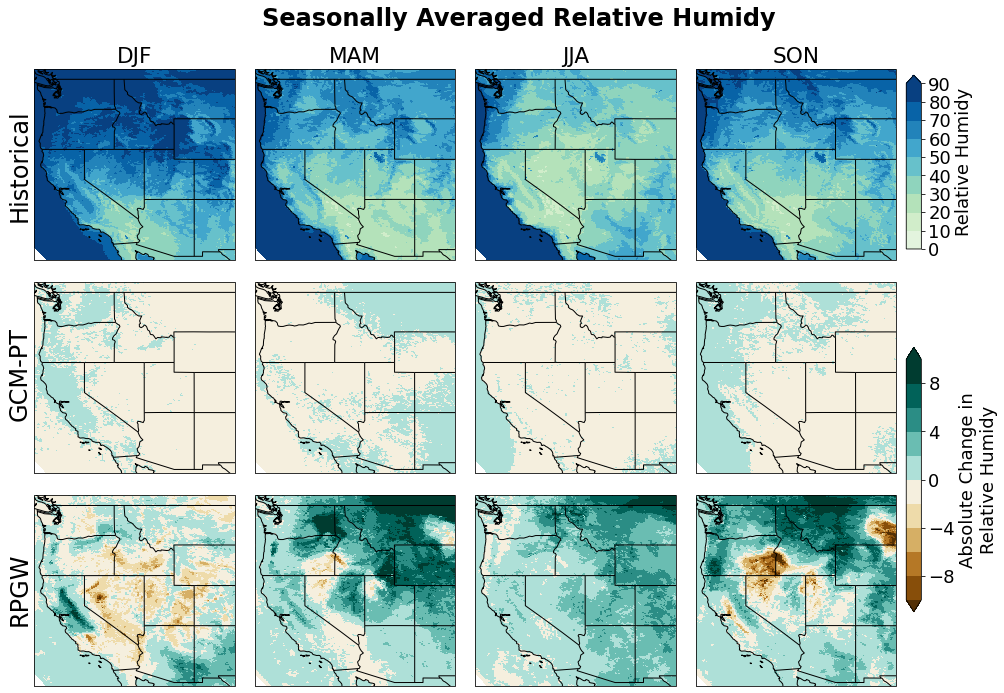

In [21]:
seasonal_spatial_plot_RH_VPD(Data_Dict, Basin_Mask,"RH", "Relative Humidy", "Relative Humidy", 
                                          "", "GnBu", "BrBG", 100, 0, 10, 10, 2)

### Figure S7

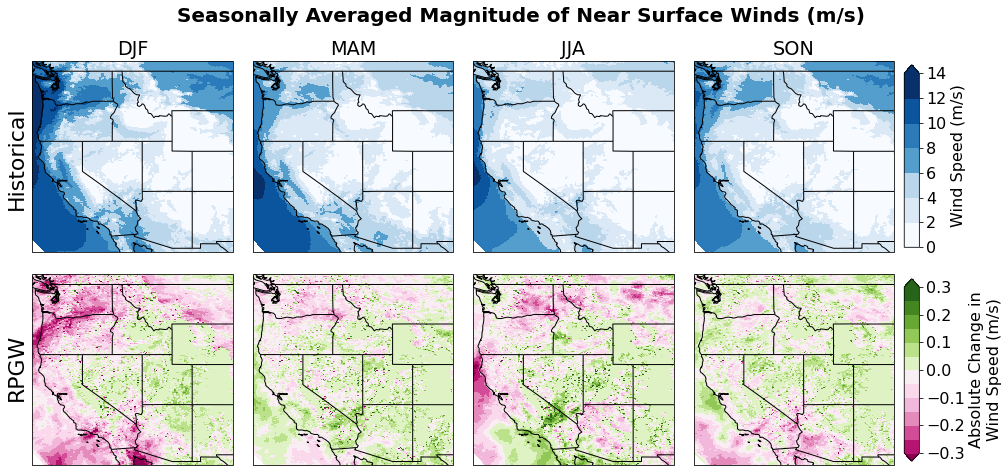

In [22]:
seasonal_spatial_plot_RPGW(Data_Dict, Basin_Mask,"full", "GWIND", "Magnitude of Near Surface Winds", "Wind Speed",
                           "(m/s)", "Blues", "PiYG", 16, 0, 2,.3,.05)

## Water Budget Timelines 

In [ ]:
##PLOTTING FUNCTION##
#################
#WB_timeseries(data, mask, PI)
#################

##DESCRIPTION##
#################
#Water Budget Time Series Plot#
#Creates time series of temperature, precip, ET, snow melt rate, and streamflow for 
    #the RPGW (RPGW, RPGW-T,RPGW-P,RPGW-P+T) or GCM-PT (GCM-PT,GCM-T) suit of experiments
#################

##ARGUMENTS##
#################
#PI: suit of experiments to plot (RPGW/GCM-PT)
#################

### Figure 11

Colorado
Sierra Nevadas
Columbia


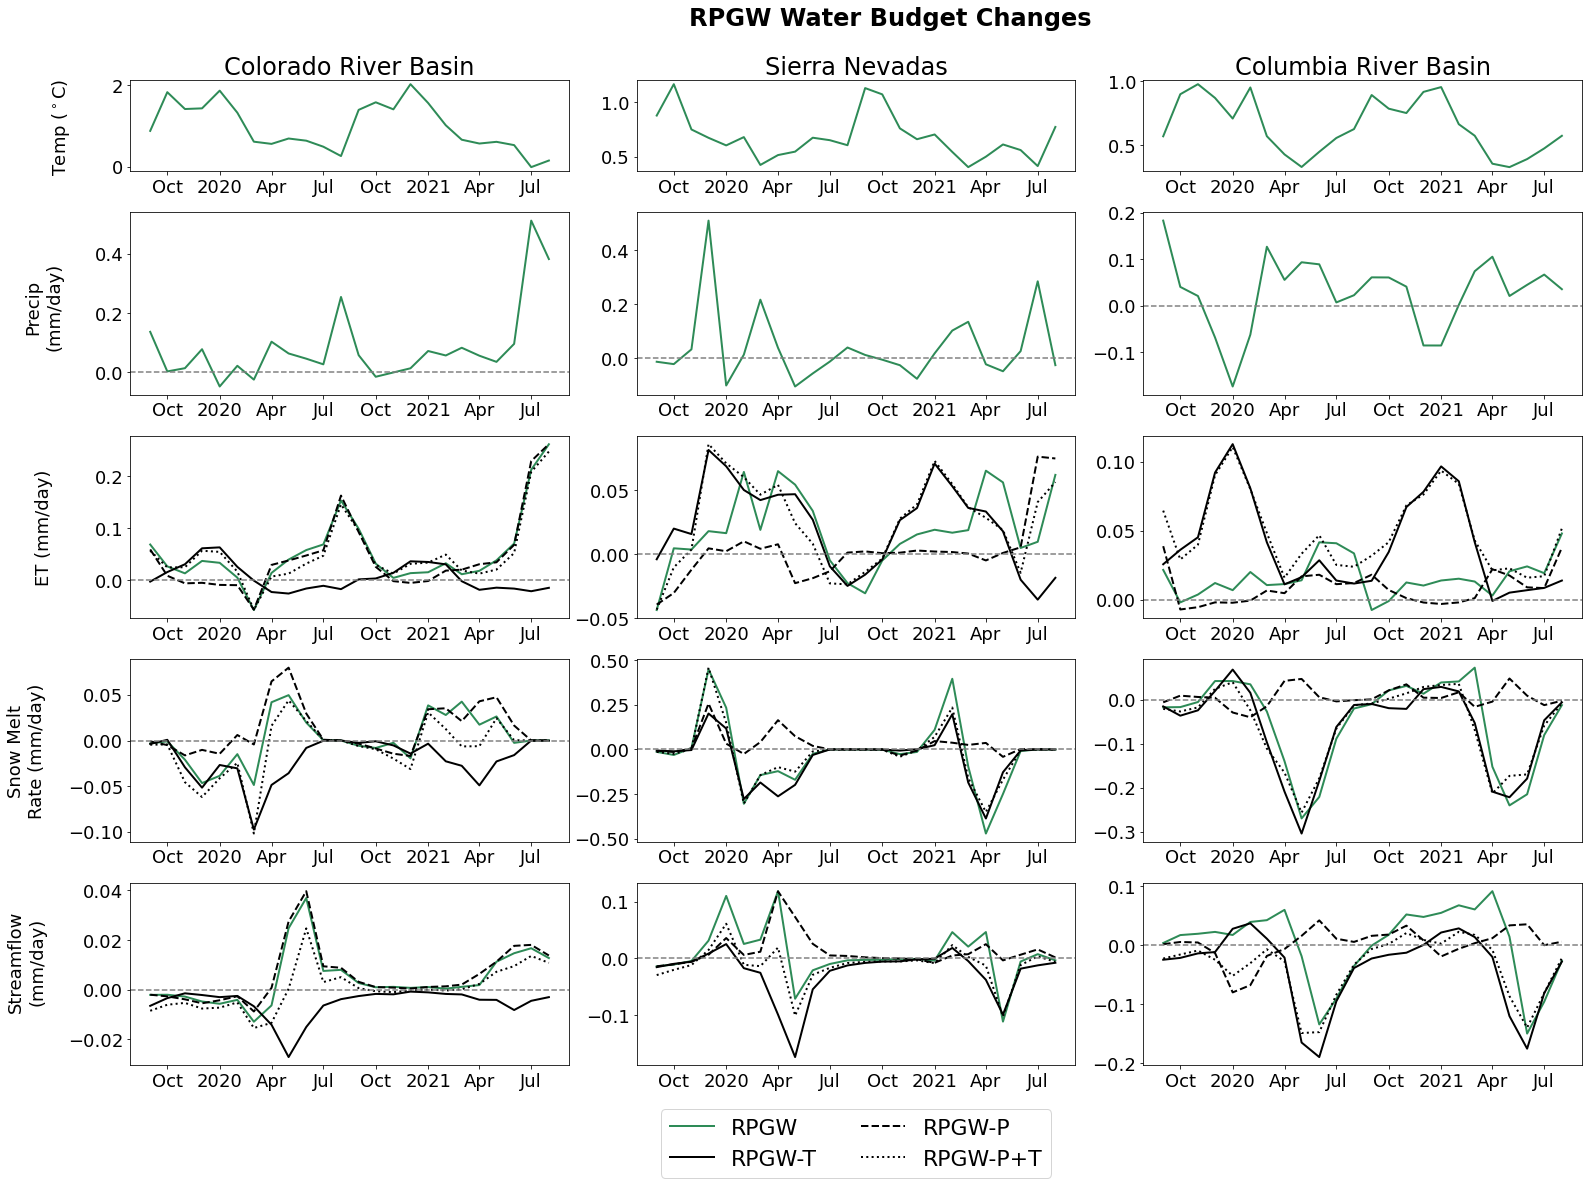

In [23]:
WB_timeseries(Data_Dict, Basin_Mask,"RPGW")

### Figure S8

Colorado
Sierra Nevadas
Columbia


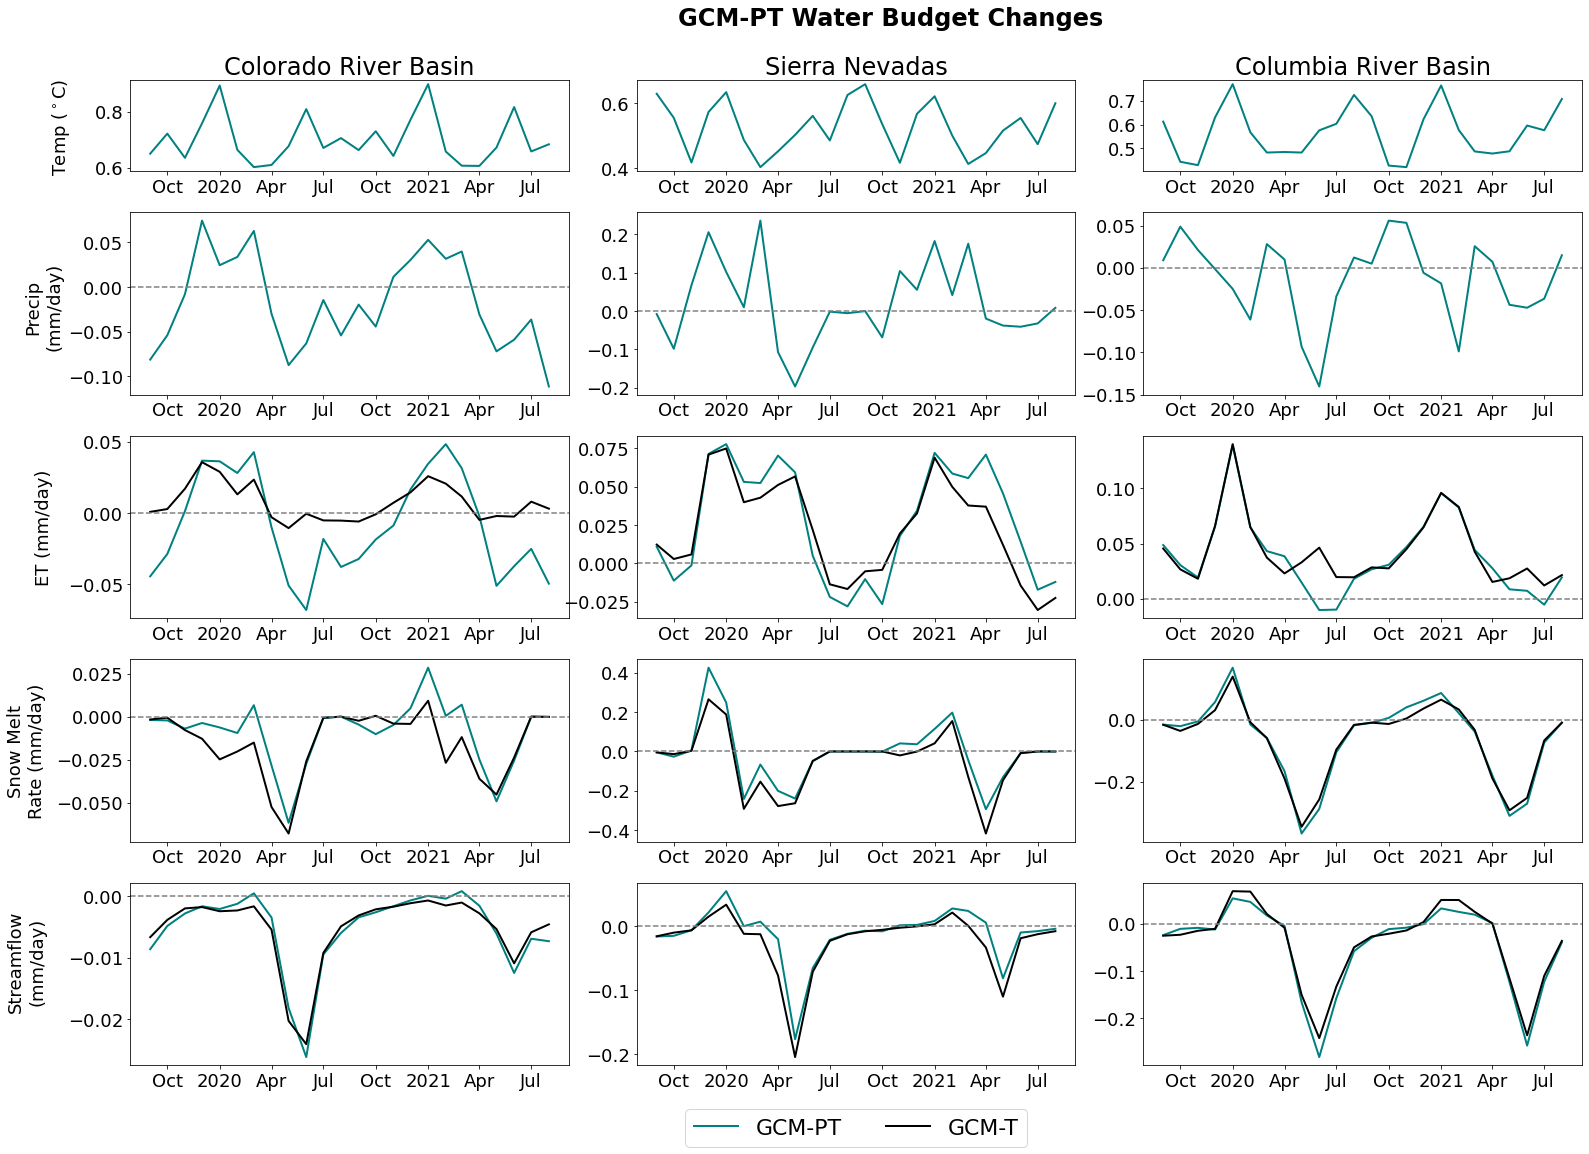

In [24]:
WB_timeseries(Data_Dict, Basin_Mask,"GCM-PT")